In [1]:
from symbulate import *
%matplotlib inline

In [2]:
P = BoxModel([1, 2, 3, 4], size=2, replace=True)
P.sim(5)

0,"(3, 2)"
1,"(1, 3)"
2,"(3, 4)"
3,"(2, 3)"
4,"(4, 1)"


In [3]:
P.sim(16000).tabulate()

"(1, 1)",1025
"(1, 2)",1027
"(1, 3)",948
"(1, 4)",1029
"(2, 1)",1022
"(2, 2)",939
"(2, 3)",965
"(2, 4)",1017
"(3, 1)",1003
"(3, 2)",1024
"(3, 3)",1001


In [4]:
P.sim(16000).tabulate(normalize=True)

"(1, 1)",0.0605
"(1, 2)",0.0625625
"(1, 3)",0.0614375
"(1, 4)",0.059125
"(2, 1)",0.0598125
"(2, 2)",0.0613125
"(2, 3)",0.064375
"(2, 4)",0.062375
"(3, 1)",0.0659375
"(3, 2)",0.06225
"(3, 3)",0.0609375


In [5]:
P = BoxModel([1, 2, 3, 4], size=2)
X = RV(P, sum)
Y = RV(P, max)
Z = RV(P) # default is identity; will return outcomes

In [6]:
outcome = (3,  2)
X(outcome), Y(outcome), Z(outcome)

(5, 3, (3, 2))

In [7]:
X.sim(5)

0,6
1,2
2,4
3,6
4,3


In [8]:
x = X.sim(16000)
x.tabulate()

2,932
3,2053
4,2951
5,4049
6,2979
7,2016
8,1020
Total,16000


(5.013625, 1.5766069133982004)

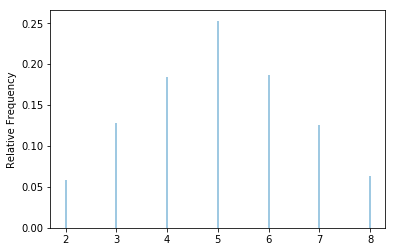

In [9]:
x.plot()
x.mean(), x.sd()

(3.128, 0.9228304286270583)

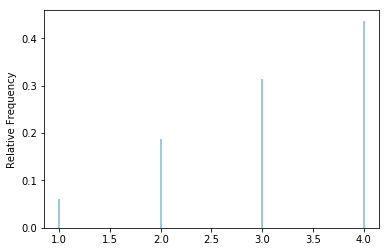

In [10]:
y = Y.sim(10000)
y.plot()
y.mean(), y.sd()

In [11]:
(Z & X & Y).sim(5)

0,"((1, 1), 2, 1)"
1,"((3, 4), 7, 4)"
2,"((4, 3), 7, 4)"
3,"((4, 4), 8, 4)"
4,"((3, 4), 7, 4)"


In [12]:
xy = (X & Y).sim(16000)
xy.tabulate()

"(2, 1)",974
"(3, 2)",1959
"(4, 2)",1026
"(4, 3)",1992
"(5, 3)",2070
"(5, 4)",2038
"(6, 3)",1004
"(6, 4)",2017
"(7, 4)",1945
"(8, 4)",975
Total,16000


In [13]:
xy.tabulate(normalize=True)

"(2, 1)",0.060875
"(3, 2)",0.1224375
"(4, 2)",0.064125
"(4, 3)",0.1245
"(5, 3)",0.129375
"(5, 4)",0.127375
"(6, 3)",0.06275
"(6, 4)",0.1260625
"(7, 4)",0.1215625
"(8, 4)",0.0609375
Total,0.9999999999999999


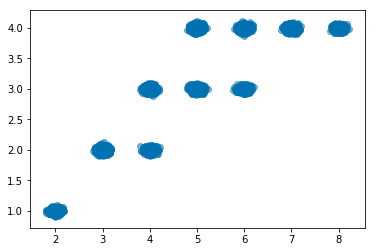

In [14]:
xy.plot(jitter=True)

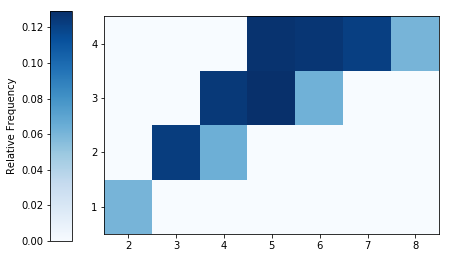

In [15]:
xy.plot('tile')

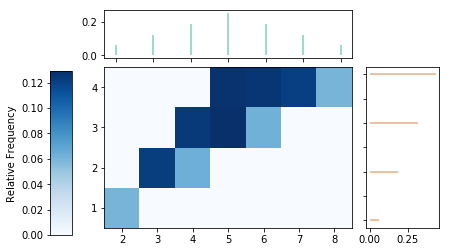

In [16]:
xy.plot(['tile', 'marginal'])

In [17]:
(Y | (X == 6) ).sim(10000).tabulate()

3,3346
4,6654
Total,10000


3.6717

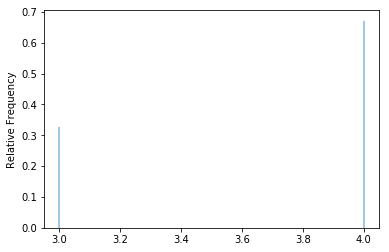

In [18]:
y_given_Xeq6 = (Y | (X == 6) ).sim(10000)
y_given_Xeq6.plot()
y_given_Xeq6.mean()

6.2874

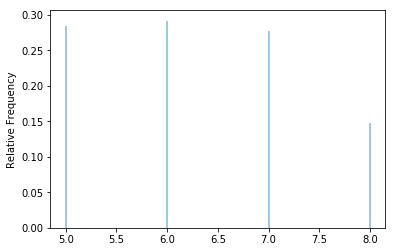

In [19]:
x_given_Yeq4 = (X | (Y == 4) ).sim(10000)
x_given_Yeq4.plot()
x_given_Yeq4.mean()

16.9809

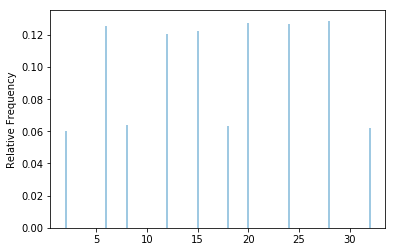

In [20]:
W = X * Y
w = W.sim(10000)
w.plot()
w.mean()

# Exercise 2.4

Note: Python has zero-based indexing, so `X[0]` represents $X_1$.

In [21]:
P = BoxModel([1, 0], size=3, replace=True)
X = RV(P)
S = RV(P, cumsum)

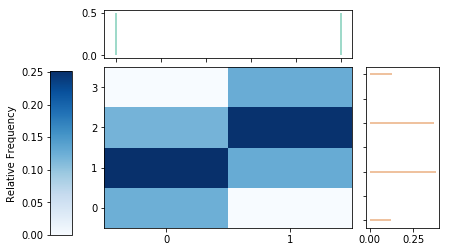

In [22]:
(S[0] & S[2]).sim(10000).plot(['tile','marginal'])

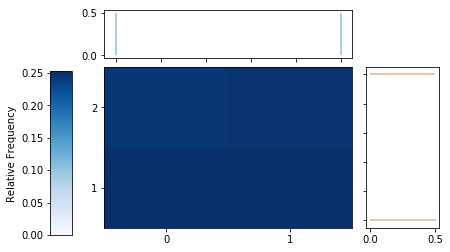

In [23]:
( (S[0] & S[2]) | (S[1] == 1) ).sim(10000).plot(['tile','marginal'])

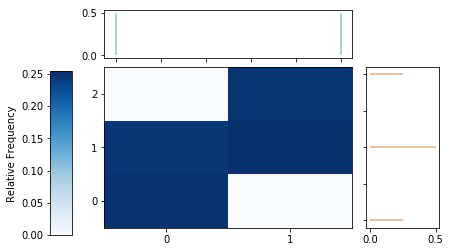

In [24]:
( (S[1] & S[2]) | (S[0] == 0) ).sim(10000).plot(['tile','marginal'])

# Exercise 2.6

In [25]:
# define a function that takes as an input a sequence of coin flips
# and returns the number of flips which follow H
def trials_following_H(x):
    return sum(x[0:len(x)-1])

# define a function that takes as an input a sequence of coin flips
# and returns the number of flips which follow H that result in H
def H_following_H(x):
    return sum(a*b for a, b in zip(x[1:len(x)], x[0:len(x)-1]))

# probability space corresponding to four fair coin flips
P = BoxModel([0,1], size = 4)

# N is the RV representing the number of flips which follow H
N = RV(P, trials_following_H)

# X is the RV representing the number of flips which follow H that result in H
X = RV(P, H_following_H)

0.40791666666666665

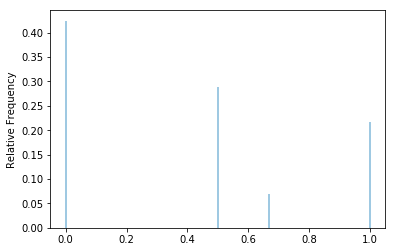

In [26]:
x = ( (X / N) | (N > 0) ).sim(10000)
x.plot()
x.mean()

In [27]:
x.tabulate(normalize=True)

0.0,0.4246
0.5,0.2885
0.6666666666666666,0.0697
1.0,0.2172
Total,1.0
